In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


tot = pd.read_csv('NPS Total Visitors.csv')
#find change from previous year
i = tot.shape[0]-1
tot['Change'] = 0
while i > 0: 
   tot['Change'].iloc[i] = (tot['Visitor Count'].iloc[i] - 
                              tot['Visitor Count'][i-1])/tot['Visitor Count'].iloc[i-1]*100
   i = i-1


by_park = pd.read_csv('Annual Visitation By Park.csv')
by_park = by_park[['ParkName', 'UnitCode', 'ParkType', 'Region', 'State', 'Year', 'Month', 'RecreationVisits']]
by_park['RecreationVisits'] = by_park['RecreationVisits'].replace(',','', regex=True)
by_park['RecreationVisits'] = by_park['RecreationVisits'].apply(pd.to_numeric)

C:\Users\Michael\AppData\Local\Temp\ipykernel_18736\2677970787.py:17: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  by_park = pd.read_csv('Annual Visitation By Park.csv')


In [2]:
tot.head()

,Year,Visitor Count,Change
0,1904,120690,0.000000
1,1905,140954,16.790123
2,1906,30569,-78.312783
3,1907,32935,7.739867
4,1908,42768,29.855777


In [3]:
tot.sort_values(['Change'], ascending=True)

,Year,Visitor Count,Change
2,1906,30569,-78.312783
38,1942,8891495,-56.600672
39,1943,6383513,-28.206528
116,2020,237064332,-27.617617
98,2002,227299880,-18.784903
...,...,...,...
32,1936,11749790,58.019484
15,1919,781178,79.078084
30,1934,6095201,87.217218
42,1946,20918012,92.694206


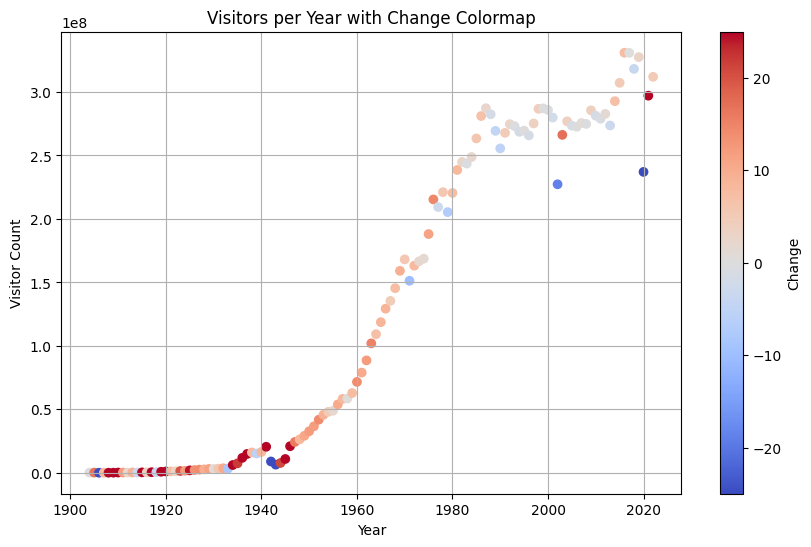

In [4]:
max_change = max(abs(min(tot['Change'])), abs(max(tot['Change'])))

plt.figure(figsize=(10, 6))
plt.scatter(tot['Year'], tot['Visitor Count'], c=tot['Change'], cmap = 'coolwarm',
            vmin=-25, vmax=25)
plt.colorbar(label='Change')
plt.title('Visitors per Year with Change Colormap')
plt.xlabel('Year')
plt.ylabel('Visitor Count')
plt.grid(True)
plt.show()

In [5]:
by_park.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,1,5722
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,2,7108
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,3,12726
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,4,23698
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2000,5,27027


In [190]:
rec_visits_year = pd.pivot_table(by_park, values='RecreationVisits', index=['Year'], aggfunc = np.sum)
rec_visits_year

,RecreationVisits
Year,
2000,285891275
2001,279873926
2002,277299880
2003,266230290
2004,276908337
2005,273488751
2006,272623980
2007,275581547
2008,274852949


In [6]:
table = pd.pivot_table(by_park, values='RecreationVisits', index=['ParkName', 'Year'], aggfunc = np.sum)
table

RecreationVisits
ParkName                       Year                  
Abraham Lincoln Birthplace NHP 2000            236180
                               2001            229675
                               2002            250772
                               2003            211650
                               2004            201828
...                                               ...
Zion NP                        2018           4320033
                               2019           4488268
                               2020           3591254
                               2021           5039835
                               2022           4692417

[8424 rows x 1 columns]

In [8]:
#output to csv
cwd = os.getcwd()
path1 = cwd + "\Clean Data\AnnualVisits_1900-2022.csv"
path2 = cwd + "\Clean Data\MonthlyVisits_2000-2022.csv"
tot.to_csv(path1, index = False)
by_park.to_csv(path2, index=False)